In [1]:
import pandas as pd
from collections import Counter
import requests as r
import matplotlib.pyplot as plt
import heapq
%matplotlib inline

In [2]:
url = 'https://gist.githubusercontent.com/ctindall/4588786/raw/d3c331af8a4af0b3a36b3d27afc99042f1733038/us-constitution.txt'
#url = 'https://raw.githubusercontent.com/grantaguinaldo/ssie/master/ssie500/hw2/pride_prejudice.txt?token=AE6SX6CH5KNONKHOSPX44OK7UOHBO'
text = r.get(url).text.strip().replace('\n', '')
textDict = dict(Counter(text))

df = pd.DataFrame({'char': list(textDict.keys()), 'char_count': list(textDict.values())})
df['freq'] = df['char_count'] * (1/df.char_count.sum())
df = df.sort_values(by='freq', ascending=False).reset_index(drop=True)
freq = {row['char']:row['freq'] for index, row in df.iterrows()}

In [3]:
heap_freq = []
for char, frq in freq.items():
    heap_freq.append([frq, [char, ""]])

heapfy = heapq.heapify(heap_freq) #Sorts in decending order, in place. 

while len(heap_freq) > 1:
    # Take the two smallest values from  the heap.
    left_node = heapq.heappop(heap_freq)
    right_node = heapq.heappop(heap_freq)
    
    # Return the list elements from left node.
    left_elements = left_node[1:]
    # Return the list elements from  the right node.
    right_elements = right_node[1:]
    
    # Scan each element in the left node and append a zero.
    for each in left_elements:
        each[1] = each[1] + '0'
      
    # Scan each element in the right node and append a one.    
    for each in right_elements:
        each[1] = each[1] + '1'

    # Append the resulting elements (coded char and new freq) back into the heap
    heapq.heappush(heap_freq, [left_node[0] + right_node[0]] + left_node[1:] + right_node[1:])

# Create dict of all of the coded char
huffDict = {each[0]:each[1] for each in heapq.heappop(heap_freq)[1:]}
huffDict

{'r': '0000',
 'f': '01000',
 'B': '000011000',
 'k': '100011000',
 'H': '010011000',
 'J': '110011000',
 '-': '0001011000',
 '(': '001001011000',
 ')': '101001011000',
 '2': '011001011000',
 '3': '111001011000',
 'D': '101011000',
 'A': '11011000',
 'b': '111000',
 'i': '0100',
 's': '1100',
 'e': '010',
 'd': '00110',
 'C': '0010110',
 'I': '001010110',
 ':': '00101010110',
 'K': '0010101010110',
 '9': '01010101010110',
 '"': '11010101010110',
 '1': '110101010110',
 'q': '1101010110',
 'E': '011010110',
 'O': '111010110',
 'm': '110110',
 'n': '1110',
 'o': '0001',
 'a': '1001',
 ',': '000101',
 '.': '00100101',
 'N': '010100101',
 'Y': '0110100101',
 'W': '1110100101',
 'w': '1100101',
 'l': '10101',
 'S': '0001101',
 'v': '1001101',
 'u': '101101',
 'T': '00011101',
 'j': '0010011101',
 'F': '01010011101',
 '0': '000011010011101',
 '8': '100011010011101',
 '5': '10011010011101',
 '4': '1011010011101',
 '6': '00111010011101',
 '7': '10111010011101',
 'Q': '1111010011101',
 'M': '110

In [6]:
encoded = ''
for i in range(len(text)):
    encoded += huffDict[text[i]]
    
print('Average Codeword Length After Encoding: {:.3f} bits'.format(len(encoded)/len(text)))

Average Codeword Length After Encoding: 4.480 bits


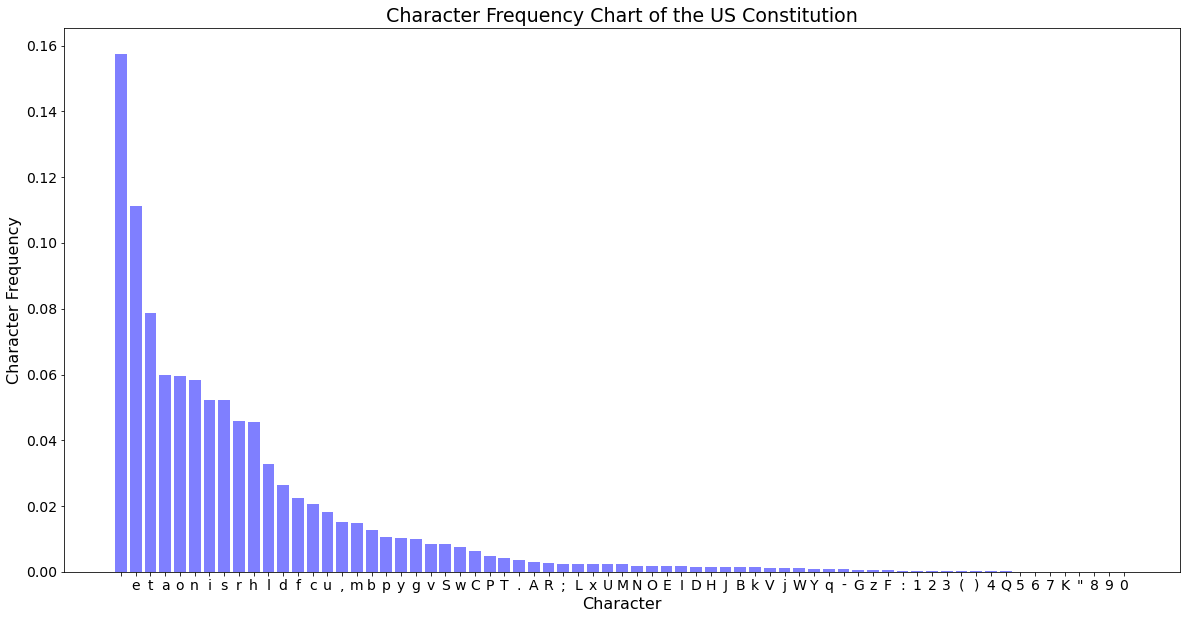

In [5]:
plt.figure(figsize=(20, 10))
plt.bar(df.char, df.freq, color='blue', alpha=0.5)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Character', fontsize=16)
plt.ylabel('Character Frequency', fontsize=16)
plt.title('Character Frequency Chart of the US Constitution', fontsize=19)
plt.show()